In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
imgpath = '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/train/'
imglist = os.listdir(imgpath)

In [13]:
imgpath+imglist[100]

'/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/train/15840_4840_16480_5480_08C3.tif'

In [18]:
import cv2
AB = cv2.imread(imgpath+imglist[100], cv2.IMREAD_UNCHANGED)

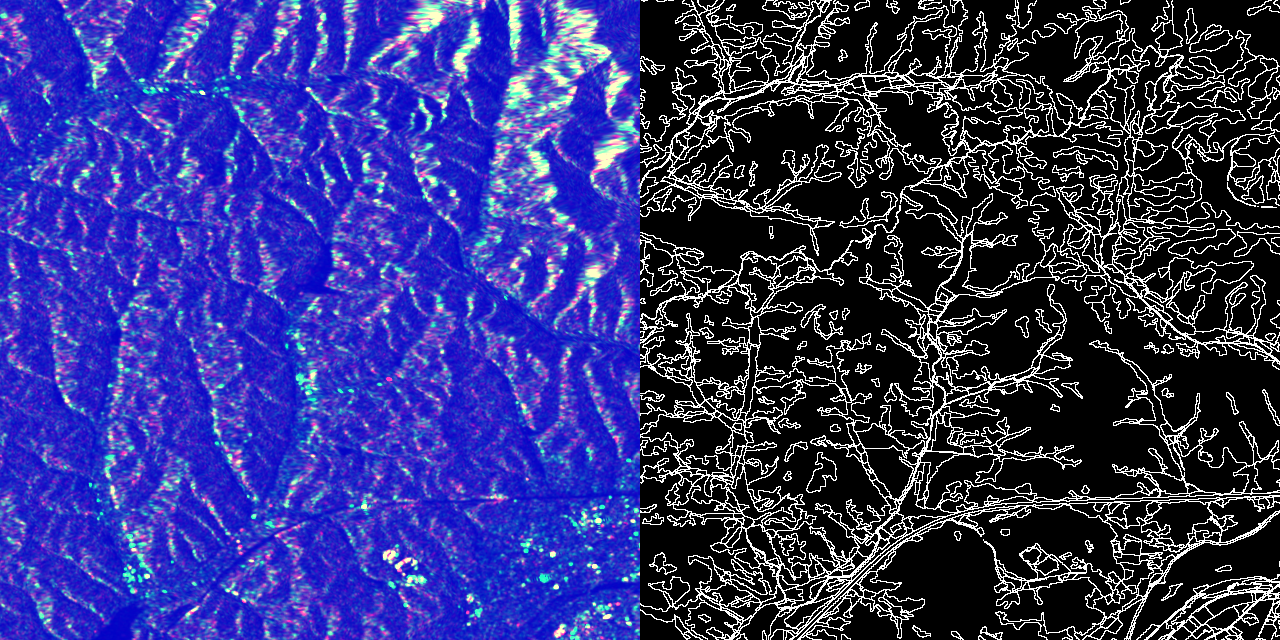

In [17]:
import numpy as np
AB = Image.fromarray(np.uint8(AB*255))
AB

In [22]:
AB = cv2.cvtColor(AB, cv2.COLOR_BGR2RGB)
A = AB[:,:640,:]; B = AB[:,640:,:]
A = np.dstack((A[...,0]+A[...,1], A[...,0]+A[...,1], A[...,0]+A[...,1]))
A = (A - A.min()) / (A.max() - A.min()) # 0-1 rescaling

In [26]:
A.min()

0.0

In [14]:
Image.open(imgpath+imglist[100])

UnidentifiedImageError: cannot identify image file '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/train/15840_4840_16480_5480_08C3.tif'

In [7]:
lblpath = '/data/BRIDGE/yolo-rotate/data/labels/sentinel/org/train/'
lbllist = os.listdir(lblpath)

## Prepare Hyperparameters

In [22]:
import easydict

args = easydict.EasyDict({
    "weights": '',
    "cfg": 'poly_yolov7.yaml',
    "data": 'sentinel.yaml',
    "hyp": 'hyp.scratch.p5.yaml',
    "epochs": 10,
    "image_weights": False,
    "batch_size": 16,
    "cache_images": True,
    "local_rank": -1,
    "world_size": 1,
    "rank": -1,
    "quad": False,
    "workers": 8,
    "polygon": True,
    "divide": False,
    "rect": False,
    "single_cls": True
})
'''
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--weights', type=str, default='', help='initial weights path')
parser.add_argument('--cfg', type=str, default='yolov7.yaml', help='model.yaml path')
parser.add_argument('--data', type=str, default='data/sentinel.yaml', help='data.yaml path')
parser.add_argument('--hyp', type=str, default='data/hyp.scratch.p5.yaml', help='hyperparameters path')
parser.add_argument('--epochs', type=int, default=300)
parser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')
parser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')
parser.add_argument('--cache-images', action='store_true', help='cache images for faster training')
parser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')
parser.add_argument('--quad', action='store_true', help='quad dataloader')
parser.add_argument('--workers', type=int, default=8, help='maximum number of dataloader workers')
parser.add_argument('--polygon', default=True, action='store_true', help='enable polygon anchor boxes')
parser.add_argument('--divide', default=False, action='store_true', help='divide images into patches')
parser.add_argument('--source', type=str, help='dst source of tif files')
opt = parser.parse_args()

opt.world_size = 1

# error message: https://stackoverflow.com/questions/48796169/how-to-fix-ipykernel-launcher-py-error-unrecognized-arguments-in-jupyter
'''

"\nimport argparse\n\nparser = argparse.ArgumentParser()\nparser.add_argument('--weights', type=str, default='', help='initial weights path')\nparser.add_argument('--cfg', type=str, default='yolov7.yaml', help='model.yaml path')\nparser.add_argument('--data', type=str, default='data/sentinel.yaml', help='data.yaml path')\nparser.add_argument('--hyp', type=str, default='data/hyp.scratch.p5.yaml', help='hyperparameters path')\nparser.add_argument('--epochs', type=int, default=300)\nparser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')\nparser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')\nparser.add_argument('--cache-images', action='store_true', help='cache images for faster training')\nparser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')\nparser.add_argument('--quad', action='store_true', help='quad dataloader')\nparser.add_argument('--workers', t

In [23]:
import yaml 
from utils.general import check_file

gs = 32
train_path = imgpath
imgsz = 640
batch_size = 16

args.hyp  = check_file(args.hyp)
with open(args.hyp) as f:
    hyp = yaml.load(f, Loader=yaml.SafeLoader) 

args.data, args.cfg, args.hyp, args.weights = check_file(args.data), check_file(args.cfg), check_file(args.hyp), check_file(args.weights)  # check files
        


## Prepare Datasets

In [24]:
from utils.datasets import create_dataloader
from utils.general import colorstr

dataloader, dataset = create_dataloader(train_path, imgsz, batch_size, gs, args,
                                            hyp=hyp, augment=True, cache=args.cache_images, rect=args.rect, rank=args.rank,
                                            world_size=args.world_size, workers=args.workers,
                                            image_weights=args.image_weights, quad=args.quad, prefix=colorstr('train: '), 
                                            polygon=args.polygon)

FileNotFoundError: [Errno 2] No such file or directory: './data/yolo-rotate.yaml'

In [1]:
from utils.gdal_preprocess import *

In [2]:
path ='/data/BRIDGE/yolo-rotate/data/images/sentinel/water_line/'

In [32]:
from tifffile import imread
import os
path = '/data/BRIDGE/yolo-rotate/data/images/sentinel/water_line/'
currpath = '/data/BRIDGE/yolo-rotate/data/images/sentinel'
for div_set in ['train','test','valid']:
    fl_list = os.listdir(os.path.join(currpath,div_set))
    fl_list = [f for f in fl_list if f.endswith('tif')]

    for f in fl_list:
        im = imread(os.path.join(currpath,div_set,f))
        im = (im[...,1]==2)*1
        im = np.array(im, np.float32)

        imwrite(os.path.join(path,div_set,f), np.dstack([im, im, im]))

In [3]:
div_set = 'train'
fl_list = os.listdir(os.path.join(path,div_set))
fl_list = [f for f in fl_list if f.endswith('tif')]
fl_list[0]

'4400_1320_5040_1960_B397.tif'

In [28]:
from tifffile import imread
f = fl_list[5]
im = imread(os.path.join(path,div_set,f))

im.shape

(640, 640, 2)

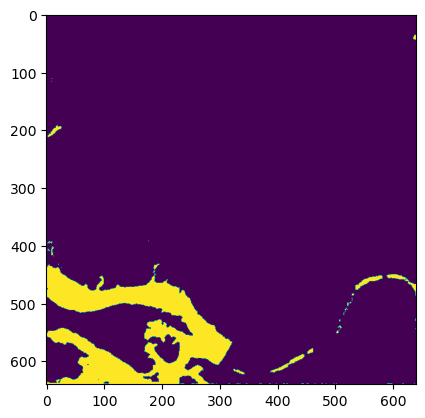

In [29]:
import matplotlib.pyplot as plt
plt.imshow((im[...,1]==2)*1)

In [30]:
f

'2640_7040_3280_7680_8474.tif'

In [18]:
import cv2
path = '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/validA/880_4840_1520_5480_8A42_A.tif'
edge_path = '/data/BRIDGE/OD-cycleGAN/data/images/sentinel/gan/validB/880_4840_1520_5480_8A42_B.tif'

im = cv2.imread(path, cv2.IMREAD_UNCHANGED)

In [19]:
im.shape

(640, 640, 3)

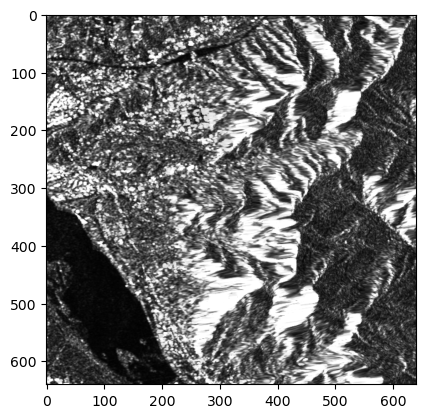

In [20]:
import matplotlib.pyplot as plt
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [25]:
gray = np.uint8(gray*255)
edges = cv2.Canny(gray, threshold1=30, threshold2=80)

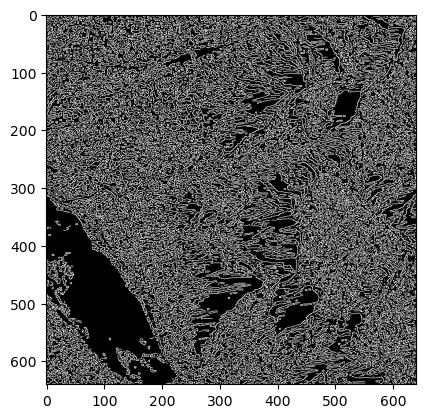

In [26]:
plt.imshow(edges, cmap="gray")

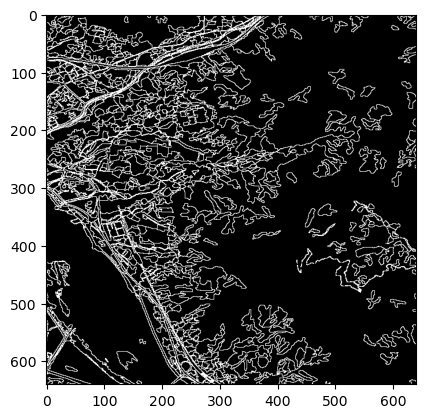

In [27]:
im_edge = cv2.imread(edge_path, cv2.IMREAD_UNCHANGED)
plt.imshow(im_edge, cmap="gray")

In [15]:
import numpy as np

np.uint8(gray*255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 181, 203, 179],
       [  0,   0,   0, ..., 164, 202, 160],
       [  0,   0,   0, ..., 145, 165, 123]], dtype=uint8)

split the image

In [3]:
imgpath = './data/images/sentinel/gan/train/'
imglist = os.listdir(imgpath)
imglist

['30800_9240_31440_9880_2A3F.tif',
 '12320_6160_12960_6800_BC37.tif',
 '3520_5720_4160_6360_F629.tif',
 '3960_15400_4600_16040_D7D1.tif',
 '21120_15840_21760_16480_A5C7.tif',
 '11880_13200_12520_13840_08C3.tif',
 '7480_17160_8120_17800_122F.tif',
 '28600_1320_29240_1960_85C6.tif',
 '16280_11000_16920_11640_A061.tif',
 '5280_9240_5920_9880_464F.tif',
 '12320_2640_12960_3280_464F.tif',
 '15840_15400_16480_16040_08C3.tif',
 '17160_9680_17800_10320_4661.tif',
 '14960_10120_15600_10760_CEFD.tif',
 '25520_8360_26160_9000_A8A5.tif',
 '6160_8800_6800_9440_1AA8.tif',
 '20240_5720_20880_6360_A061.tif',
 '11000_9240_11640_9880_A8A5.tif',
 '11000_12320_11640_12960_D7D1.tif',
 '27280_9240_27920_9880_6E90.tif',
 '29040_3520_29680_4160_CEFD.tif',
 '25080_11880_25720_12520_B338.tif',
 '19800_13200_20440_13840_8A8B.tif',
 '9240_11000_9880_11640_464F.tif',
 '30800_6600_31440_7240_BDB1.tif',
 '24200_3960_24840_4600_B338.tif',
 '22440_7040_23080_7680_BE4F.tif',
 '11000_5720_11640_6360_EFA5.tif',
 '28600_4

In [4]:
import cv2
img = cv2.imread(imgpath+imglist[0], cv2.IMREAD_UNCHANGED)

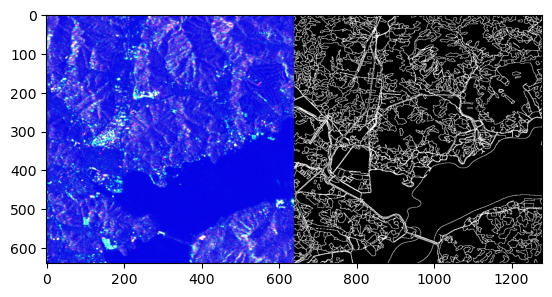

In [5]:
plt.imshow(img)

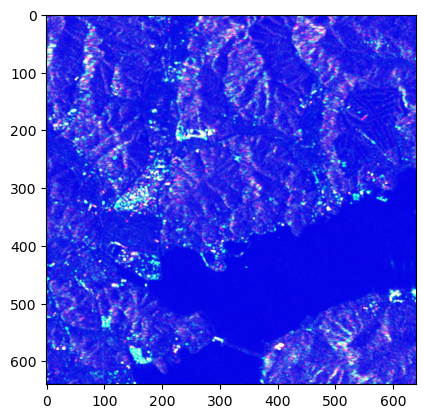

In [8]:
plt.imshow(img[:,:640,:])

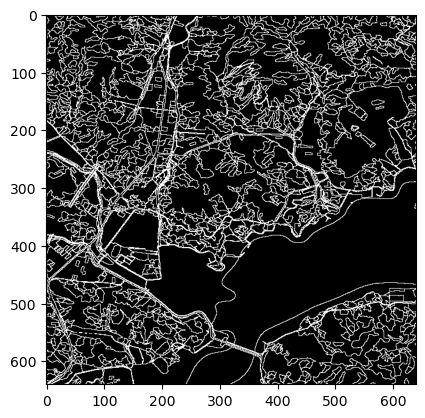

In [9]:
plt.imshow(img[:,640:,:])